### Loading required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
# from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
# import pydotplus

### Import the dataset

In [3]:
data = pd.read_csv(r"./bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Studying the Dataset

In [4]:
# Columns in the datset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

These are the 17 columns present in the dataset

In [5]:
# Dimensions of the dataset
data.shape

(11162, 17)

There are 11,162 rows and 17 columns in the dataset

In [6]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- There are no null values in the dataset as total entries (11,162) and non-null count are same.
- int type columns are :- age,balance,day,duration,campaign,pdays,previous.
- object type columns are :- job, marital,education, default, housing, loan, contact, month, poutcome, deposit

In [7]:
# Unique values in the dataset
cols = data.columns
for i in range(0,len(data.columns)):
    unique = data[cols[i]].unique()
    print("Unique values in '{}' column:- \n {}".format(cols[i],unique))

Unique values in 'age' column:- 
 [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
Unique values in 'job' column:- 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Unique values in 'marital' column:- 
 ['married' 'single' 'divorced']
Unique values in 'education' column:- 
 ['secondary' 'tertiary' 'primary' 'unknown']
Unique values in 'default' column:- 
 ['no' 'yes']
Unique values in 'balance' column:- 
 [2343   45 1270 ... 1594 2593 -134]
Unique values in 'housing' column:- 
 ['yes' 'no']
Unique values in 'loan' column:- 
 ['no' 'yes']
Unique values in 'contact' column:- 
 ['unknown' 'cellular' 'telephone']
Unique values in 'day' column:- 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3

In [8]:
# No. of unique counts
cols = data.columns
for i in range(0,len(data.columns)):
    n_unique = data[cols[i]].nunique()
    print("Unique value counts in '{}' column:- \n {}".format(cols[i],n_unique))

Unique value counts in 'age' column:- 
 76
Unique value counts in 'job' column:- 
 12
Unique value counts in 'marital' column:- 
 3
Unique value counts in 'education' column:- 
 4
Unique value counts in 'default' column:- 
 2
Unique value counts in 'balance' column:- 
 3805
Unique value counts in 'housing' column:- 
 2
Unique value counts in 'loan' column:- 
 2
Unique value counts in 'contact' column:- 
 3
Unique value counts in 'day' column:- 
 31
Unique value counts in 'month' column:- 
 12
Unique value counts in 'duration' column:- 
 1428
Unique value counts in 'campaign' column:- 
 36
Unique value counts in 'pdays' column:- 
 472
Unique value counts in 'previous' column:- 
 34
Unique value counts in 'poutcome' column:- 
 4
Unique value counts in 'deposit' column:- 
 2


Here our 'target variable' is 'Deposit' column whose two unique values are 'yes' and 'no'

In [9]:
# Studying target variable
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

From the dataset, 5289 people deposited EMI and 5873 didn't deposit EMI on time.

In [10]:
# Duplicate value check
data.duplicated().sum()

0

So, there are no duplicates present in the dataset

### Zero - Variance check

In [11]:
# Zero - variance check -  for numerical type columns
cols = data.columns
for i in range(0,len(data.columns)):
    if data[cols[i]].dtypes == 'int64':
        var = data[cols[i]].var()
        print("Variance in '{}' column:- \n {}".format(cols[i],var))

Variance in 'age' column:- 
 141.92836551003
Variance in 'balance' column:- 
 10403291.123191012
Variance in 'day' column:- 
 70.90885441746954
Variance in 'duration' column:- 
 120498.11617000842
Variance in 'campaign' column:- 
 7.409704182922138
Variance in 'pdays' column:- 
 11828.363897496049
Variance in 'previous' column:- 
 5.253297090437703


No columns with zero variance are present, if there remove that column

### Outlier Analysis

C:\Users\iraqi\AppData\Local\Temp\ipykernel_14916\828916339.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,30,1)


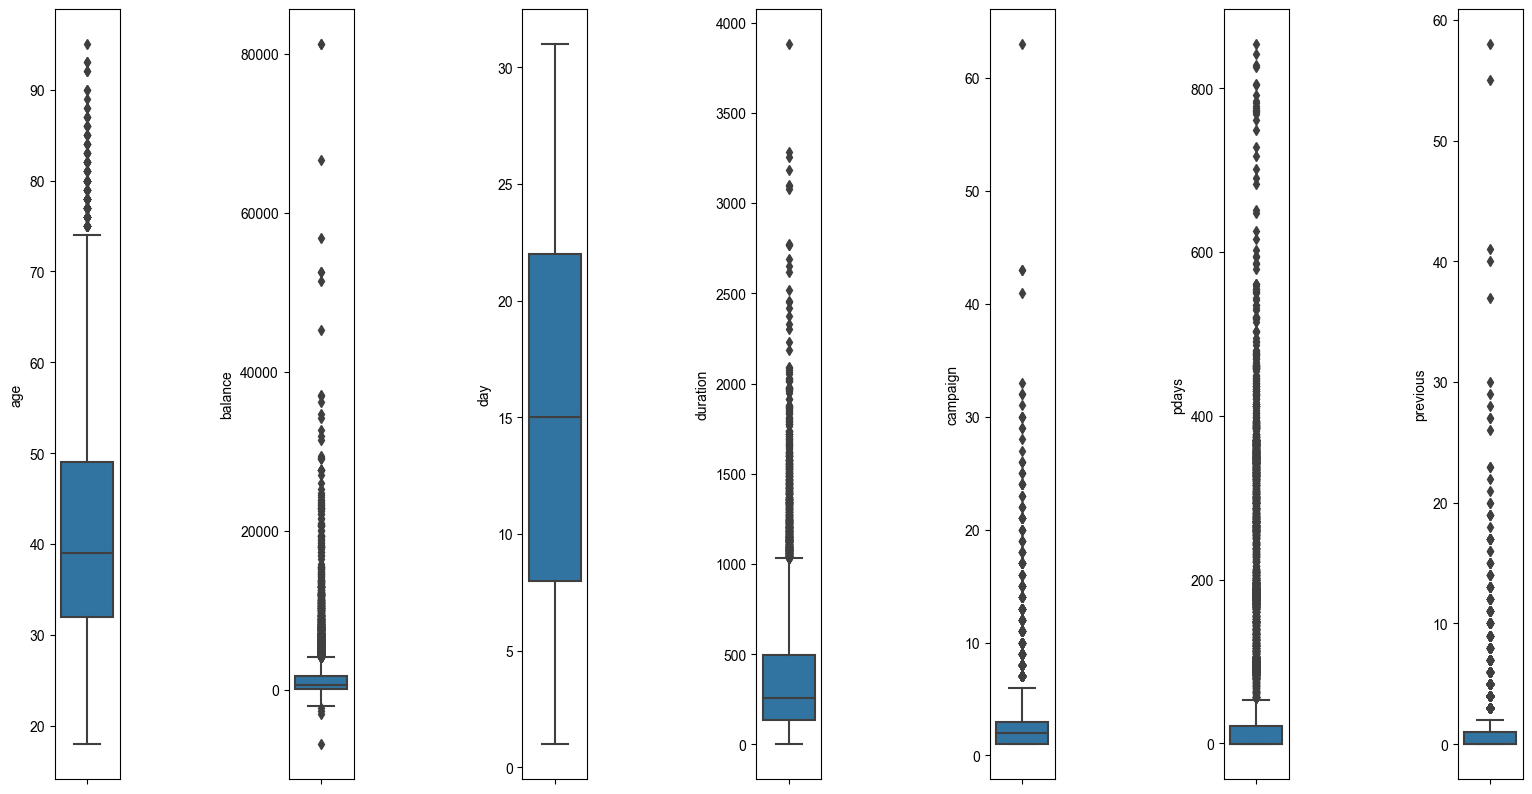

In [12]:
# Plotting boxplot of numerical only columns - Outlier visualization and detection
plt.subplots(figsize= (30,10))
plt.subplot(1,30,1)
sns.boxplot(y = 'age', data = data, orient = 'v')
plt.subplot(1,30,4)
sns.boxplot(y = 'balance', data = data, orient = 'v')
plt.subplot(1,30,7)
sns.boxplot(y = 'day', data = data, orient = 'v')
plt.subplot(1,30,10)
sns.boxplot(y = 'duration', data = data, orient = 'v')
plt.subplot(1,30,13)
sns.boxplot(y = 'campaign', data = data, orient = 'v')
plt.subplot(1,30,16)
sns.boxplot(y = 'pdays', data = data, orient = 'v')
plt.subplot(1,30,19)
sns.boxplot(y = 'previous', data = data, orient = 'v')
sns.set_style(style = 'whitegrid')
plt.show()

We can observe from above boxplots that except 'day' column all other numerical columns are having outliers.

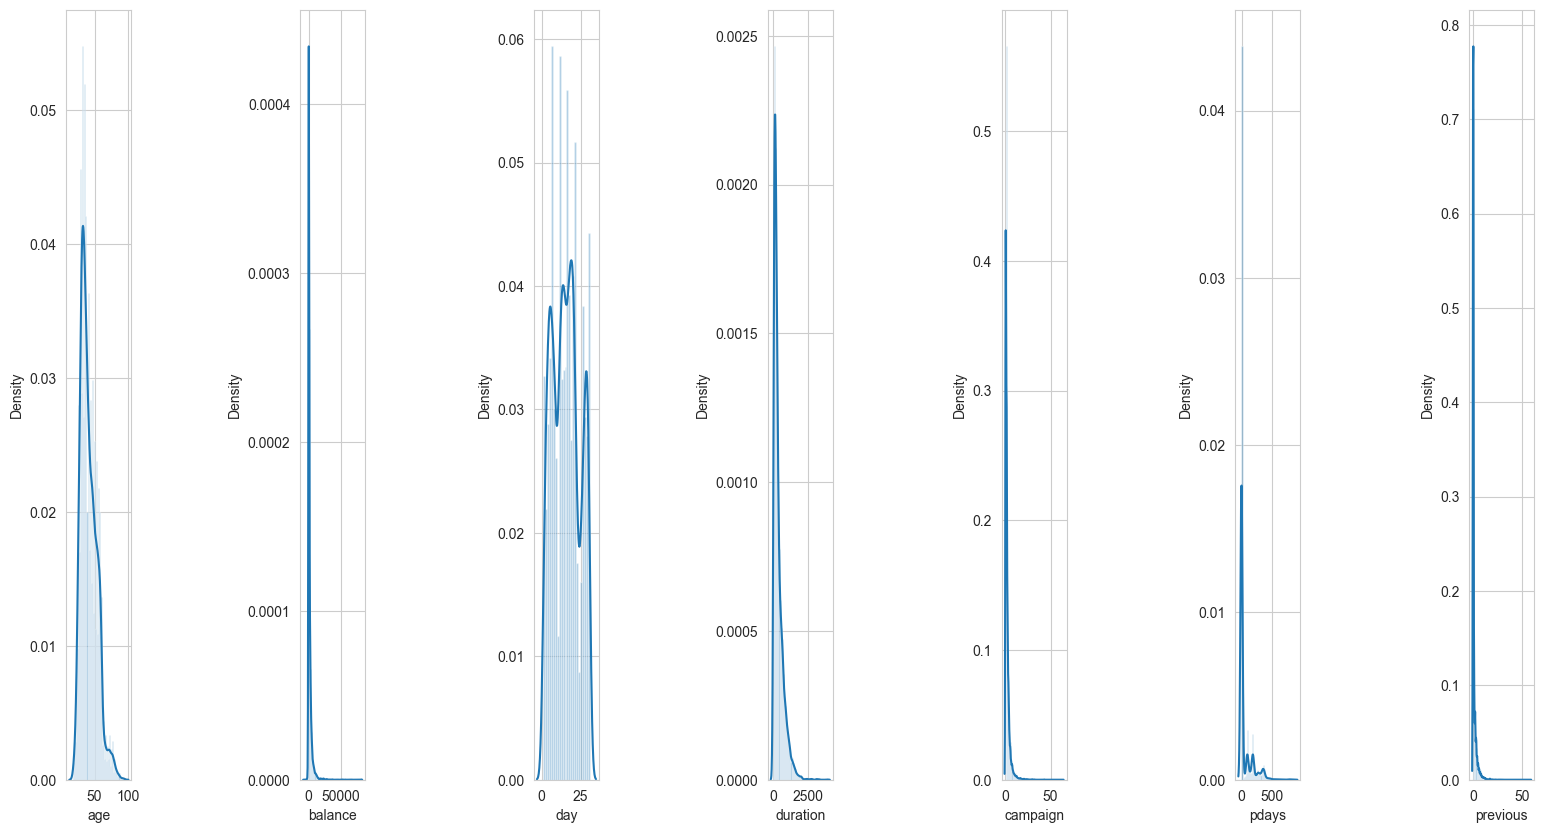

In [13]:
# Rechecking the outliers of these columns using - normal distribution - skewness check
import warnings
warnings.filterwarnings('ignore')
plt.subplots(figsize= (30,10))
plt.subplot(1,30,1)
sns.distplot(data['age'])
plt.subplot(1,30,4)
sns.distplot(data['balance'])
plt.subplot(1,30,7)
sns.distplot(data['day'])
plt.subplot(1,30,10)
sns.distplot(data['duration'])
plt.subplot(1,30,13)
sns.distplot(data['campaign'])
plt.subplot(1,30,16)
sns.distplot(data['pdays'])
plt.subplot(1,30,19)
sns.distplot(data['previous'])
sns.set_style(style = 'whitegrid')
plt.show()

We can observe high right skewness in all columns except 'day' column

In [14]:
# Outlier removal - creating function
def outlier_removal(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    min_obs = Q1 - 1.5*IQR
    max_obs = Q3 + 1.5*IQR
    return min_obs,max_obs

In [15]:
# Applying outlier_removal function on cols => 'age', 'balance','duration','campaign', 'pdays' and 'previous' 
min_age, max_age = outlier_removal(data['age'])
min_balance, max_balance = outlier_removal(data['balance'])
min_duration, max_duration = outlier_removal(data['duration'])
min_campaign, max_campaign = outlier_removal(data['campaign'])
min_pdays, max_pdays = outlier_removal(data['pdays'])
min_previous, max_previous = outlier_removal(data['previous'])

In [16]:
# Replacing outlier values with min and max. observations resp. in cols => 'age', 'balance','duration','campaign','pdays' 
# and 'previous'
data['age'] = data['age'].apply(lambda x : min_age if x < min_age else max_age if x > max_age else x)
data['balance'] = data['balance'].apply(lambda x : min_balance if x < min_balance else max_balance if x > max_balance else x)
data['duration'] = data['duration'].apply(lambda x : min_duration if x < min_duration else max_duration if x > max_duration else x)
data['campaign'] = data['campaign'].apply(lambda x : min_campaign if x < min_campaign else max_campaign if x > max_campaign else x)
data['pdays'] = data['pdays'].apply(lambda x : min_pdays if x < min_pdays else max_pdays if x > max_pdays else x)
data['previous'] = data['previous'].apply(lambda x : min_previous if x < min_previous else max_previous if x > max_previous else x)

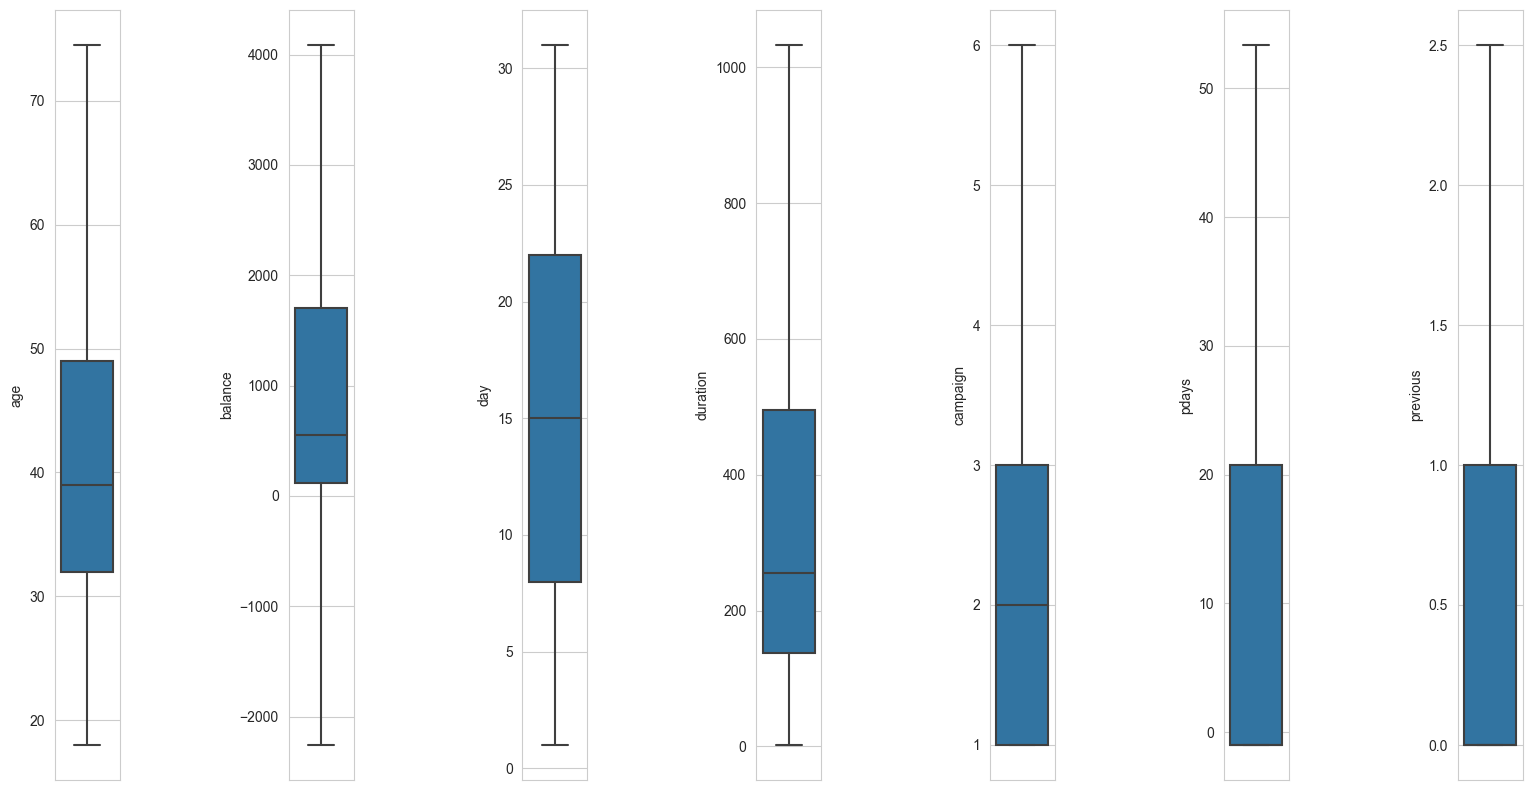

In [17]:
# Verifying outlier removal is done or not using boxplots
plt.subplots(figsize= (30,10))
plt.subplot(1,30,1)
sns.boxplot(y = 'age', data = data, orient = 'v')
plt.subplot(1,30,4)
sns.boxplot(y = 'balance', data = data, orient = 'v')
plt.subplot(1,30,7)
sns.boxplot(y = 'day', data = data, orient = 'v')
plt.subplot(1,30,10)
sns.boxplot(y = 'duration', data = data, orient = 'v')
plt.subplot(1,30,13)
sns.boxplot(y = 'campaign', data = data, orient = 'v')
plt.subplot(1,30,16)
sns.boxplot(y = 'pdays', data = data, orient = 'v')
plt.subplot(1,30,19)
sns.boxplot(y = 'previous', data = data, orient = 'v')
sns.set_style(style = 'whitegrid')
plt.show()

Thus, no outliers present

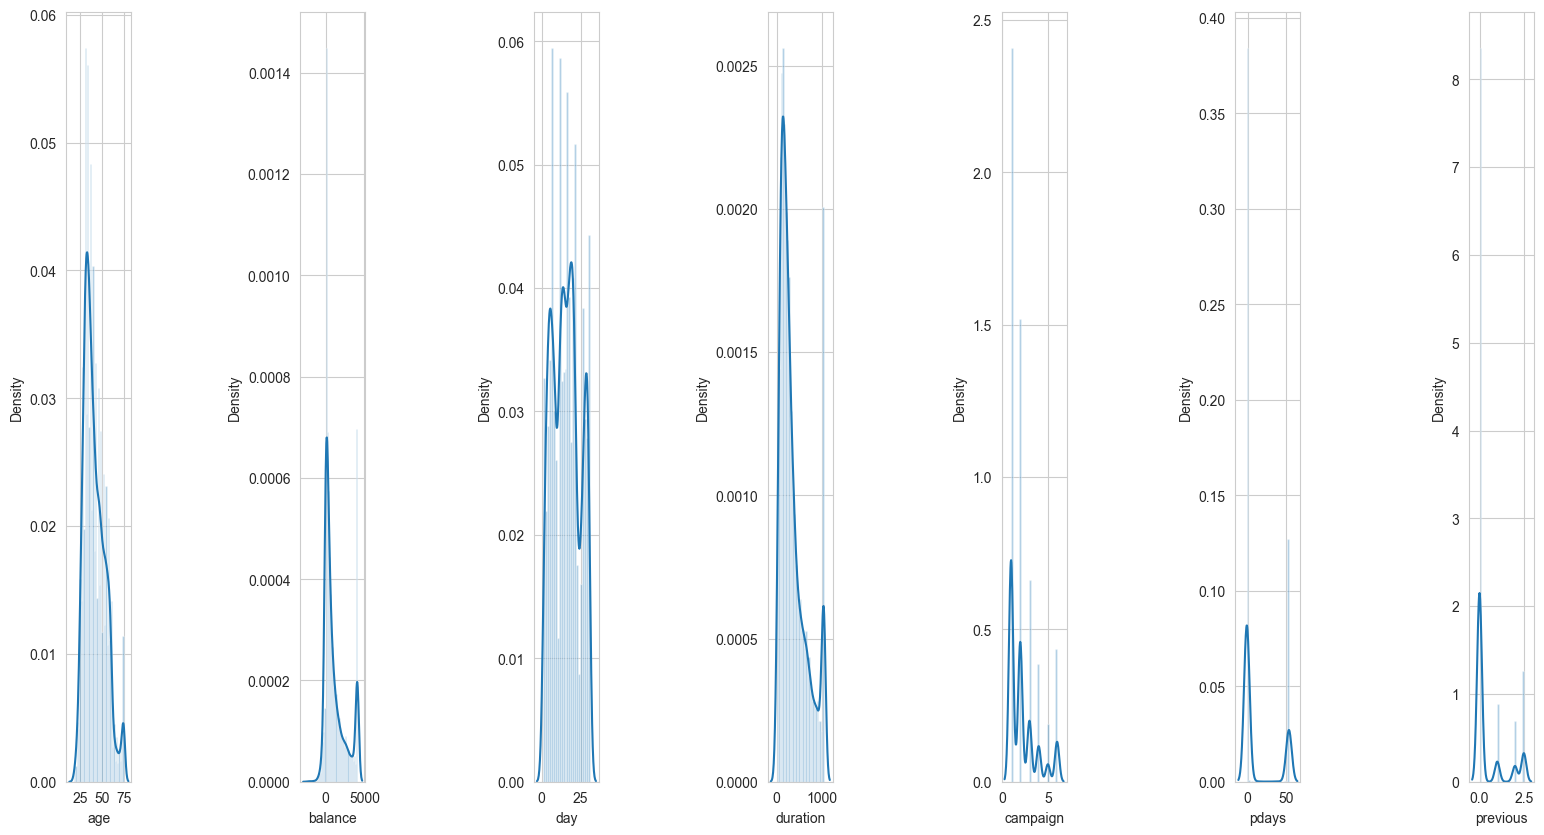

In [18]:
# Reverifying outlier removal using normal distribution
import warnings
warnings.filterwarnings('ignore')
plt.subplots(figsize= (30,10))
plt.subplot(1,30,1)
sns.distplot(data['age'])
plt.subplot(1,30,4)
sns.distplot(data['balance'])
plt.subplot(1,30,7)
sns.distplot(data['day'])
plt.subplot(1,30,10)
sns.distplot(data['duration'])
plt.subplot(1,30,13)
sns.distplot(data['campaign'])
plt.subplot(1,30,16)
sns.distplot(data['pdays'])
plt.subplot(1,30,19)
sns.distplot(data['previous'])
sns.set_style(style = 'whitegrid')
plt.show()

Although, we do not observe normal distribution, but at the same time we do not observe skewness as well

### Correlation Check

In [19]:
# Correlation check
corrmat = data.corr()
corrmat

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.137379,-0.000722,-0.000018,0.002732,0.026717,0.032912
balance,0.137379,1.000000,0.011678,0.042808,-0.032775,0.076411,0.071769
day,-0.000722,0.011678,1.000000,-0.025378,0.130002,-0.082024,-0.079515
duration,-0.000018,0.042808,-0.025378,1.000000,-0.023626,-0.032356,-0.031185
campaign,0.002732,-0.032775,0.130002,-0.023626,1.000000,-0.140442,-0.113908
pdays,0.026717,0.076411,-0.082024,-0.032356,-0.140442,1.000000,0.922183
previous,0.032912,0.071769,-0.079515,-0.031185,-0.113908,0.922183,1.000000


<AxesSubplot: >

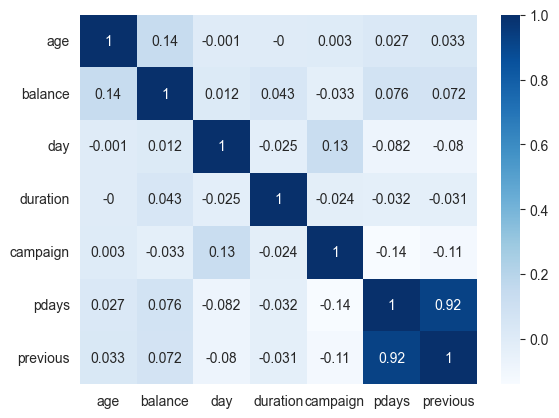

In [20]:
# Visualzing corrmat - using heatmap
sns.heatmap(round(corrmat,3), annot = True, cmap = 'Blues')

We can observe (pdays, previous) columns are highly correlated.
So, we need to drop one of these based on domain expertise before model building

In [50]:
# Dropping pdays column
data.drop('pdays',axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1033.0,1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1033.0,1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1033.0,1.0,0.0,unknown,yes
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579.0,1.0,0.0,unknown,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673.0,2.0,0.0,unknown,yes


### Data Preprocessing

###### Label Encoding

In [51]:
contact_df = data

In [52]:
# Converting categorical columns into numerical - Label Encoding
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [53]:
encoded_df = preprocessor(contact_df)

###### Standardization 
(Although Decision Trees are insensitive to weights of variables still we will perform standardization in order to analyze model perfromance)

In [54]:
# Importing standardization function
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [55]:
# Standardizing the dependent variable values
new_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign','previous', 'poutcome'] 
for i in new_cols:
    encoded_df[i] = std_scale.fit_transform(encoded_df[[i]])
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,1.530858,-1.391604,-0.318672,-0.380501,-0.123617,0.908149,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.388642,-0.814270,-0.543848,0.520705,1
1,1.273537,-1.391604,-0.318672,-0.380501,-0.123617,-0.794565,-0.947616,-0.387923,1.844786,-1.265746,0.800268,2.388642,-0.814270,-0.543848,0.520705,1
2,-0.013067,1.399105,-0.318672,-0.380501,-0.123617,0.113105,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.388642,-0.814270,-0.543848,0.520705,1
3,1.187764,0.778947,-0.318672,-0.380501,-0.123617,1.006696,1.055280,-0.387923,1.844786,-1.265746,0.800268,0.793993,-0.814270,-0.543848,0.520705,1
4,1.101990,-1.391604,-0.318672,0.953822,-0.123617,-0.691572,-0.947616,-0.387923,1.844786,-1.265746,0.800268,1.124163,-0.156846,-0.543848,0.520705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.699257,-1.081525,1.279987,-1.714823,-0.123617,-0.827167,1.055280,-0.387923,-0.598149,0.515650,-1.706158,-0.337014,-0.814270,-0.543848,0.520705,0
11158,-0.184615,0.778947,-0.318672,-0.380501,-0.123617,-0.284788,-0.947616,-0.387923,1.844786,0.040612,0.173661,-0.948179,1.158001,-0.543848,0.520705,0
11159,-0.785030,1.399105,1.279987,-0.380501,-0.123617,-0.806420,-0.947616,-0.387923,-0.598149,0.396891,-1.392855,-0.691770,-0.156846,-0.543848,0.520705,0
11160,0.158480,1.399105,-0.318672,-0.380501,-0.123617,-0.827908,-0.947616,2.577830,-0.598149,-0.909466,0.800268,-1.208099,-0.156846,2.257200,-2.470600,0


In [56]:
# Separating target values ('deposit' values) from other features
x = encoded_df.drop(['deposit'], axis = 1).values
y = encoded_df['deposit'].values

### Splitting the data into Train-test 

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

### Build the decision tree model

In [58]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(max_depth=2 ,min_samples_split=2,min_samples_leaf=1)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train = model_dt_2.score(x_train,y_train)
print('Training score: ',model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print('Testing score: ',model_dt_2_score_test)

Training score:  0.710717885541494
Testing score:  0.7133900582176445


In [59]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(max_depth=4 ,min_samples_split=2,min_samples_leaf=1)
model_dt_4.fit(x_train,y_train)
model_dt_4_score_train = model_dt_4.score(x_train,y_train)
print('Training score: ',model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print('Testing score: ',model_dt_4_score_test)

Training score:  0.7943778698622466
Testing score:  0.7913121361397224


In [60]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(max_depth=8 ,min_samples_split= 100,min_samples_leaf=10)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train = model_dt_8.score(x_train,y_train)
print('Training score: ',model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print('Testing score: ',model_dt_8_score_test)

Training score:  0.8315600851159144
Testing score:  0.8186296462158531


In [61]:
# Decision tree with depth = 20 , min_samples_split = 90, criteria = entropy
model_dt_10 = DecisionTreeClassifier(max_depth= 20 ,min_samples_split= 90,min_samples_leaf=8,criterion='entropy')
model_dt_10.fit(x_train,y_train)
model_dt_10_score_train = model_dt_10.score(x_train,y_train)
print('Training score: ',model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(x_test, y_test)
print('Testing score: ',model_dt_10_score_test)

Training score:  0.8523910852279091
Testing score:  0.8325123152709359


In [62]:
# Decision tree with depth = 20 , min_samples_split = 90
model_dt_10 = DecisionTreeClassifier(min_samples_split= 100,min_samples_leaf=10,criterion='gini' )
model_dt_10.fit(x_train,y_train)
model_dt_10_score_train = model_dt_10.score(x_train,y_train)
print('Training score: ',model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(x_test, y_test)
print('Testing score: ',model_dt_10_score_test)

Training score:  0.8462313808937171
Testing score:  0.8307210031347962


### Pruning

In [63]:
# Using minimal cost complexity pruning method to find optimal alpha value
pruning_path  = model_dt_10.cost_complexity_pruning_path(x_train,y_train)
alphas = pruning_path['ccp_alphas']
alphas

array([0.00000000e+00, 4.56371537e-06, 5.28619315e-06, 7.27058034e-06,
       8.19390954e-06, 1.19994240e-05, 1.36155652e-05, 1.54933275e-05,
       1.77515289e-05, 2.14957424e-05, 2.81557753e-05, 3.15085317e-05,
       3.41621921e-05, 3.58942567e-05, 3.62054215e-05, 4.08313294e-05,
       4.32864598e-05, 4.38016055e-05, 5.43452175e-05, 5.87380619e-05,
       6.63988823e-05, 6.80508622e-05, 7.65876539e-05, 7.90142647e-05,
       8.33271828e-05, 8.35629935e-05, 9.34560149e-05, 9.75525009e-05,
       9.76827857e-05, 1.09013007e-04, 1.11184203e-04, 1.13347950e-04,
       1.17067763e-04, 1.20420552e-04, 1.34800702e-04, 1.57772046e-04,
       1.59449623e-04, 1.61992224e-04, 1.63664615e-04, 1.90285269e-04,
       1.97261069e-04, 2.00939413e-04, 2.01900923e-04, 2.02532230e-04,
       2.03170329e-04, 2.05491926e-04, 2.07682339e-04, 2.11137947e-04,
       2.24636078e-04, 2.31681809e-04, 2.32745073e-04, 2.36401519e-04,
       2.50123554e-04, 2.52192830e-04, 2.59802139e-04, 2.66694572e-04,
      

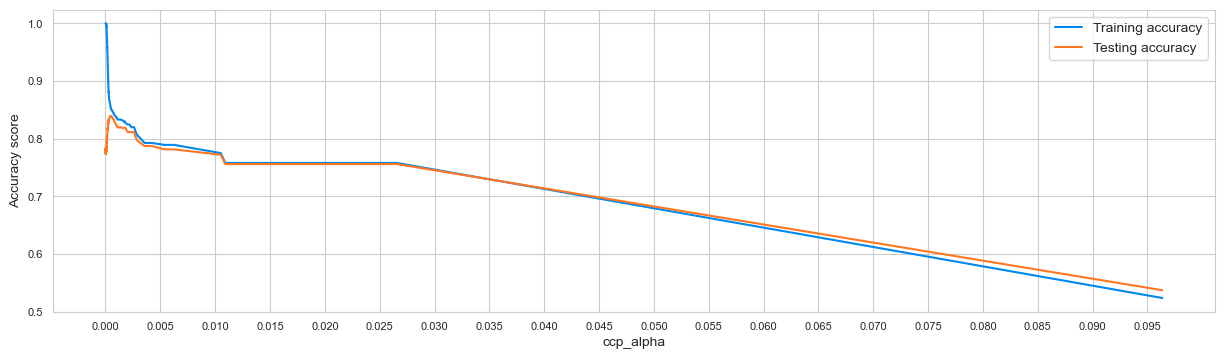

In [68]:
accuracy_train = []
accuracy_test = []

for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha = i)
    
    tree.fit(x_train,y_train)
    
    y_train_pred = tree.predict(x_train)
    y_test_pred = tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
plt.figure(figsize = (15,4))
sns.lineplot(x = alphas, y = accuracy_train, label = 'Training accuracy')
sns.lineplot(x = alphas, y = accuracy_test, label = 'Testing accuracy')
plt.xticks(ticks = np.arange(0,0.10,0.005))
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy score')
plt.show()

From above graph we can ccp_alpha value as 0.002 where, training accuracy and testing accuracy are statistically same
and this will avoid overfitting, and our model will be more generalized and perform better for new kind of data 

In [69]:
# Decision tree with ccp_alpha = 0.002
model_dt_10 = DecisionTreeClassifier(max_depth = 10, min_samples_split= 20,min_samples_leaf=10,criterion='gini' , ccp_alpha = 0.001)
model_dt_10.fit(x_train,y_train)
model_dt_10_score_train = model_dt_10.score(x_train,y_train)
print('Training score: ',model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(x_test, y_test)
print('Testing score: ',model_dt_10_score_test)

Training score:  0.8357038862134617
Testing score:  0.8217644424540976


Here both the training and testing accuracy are almost same.

In [70]:
# Decision tree with ccp_alpha = 0.003
model_dt_10 = DecisionTreeClassifier(max_depth = 10, min_samples_split= 20,min_samples_leaf=10,criterion='gini' , ccp_alpha = 0.002)
model_dt_10.fit(x_train,y_train)
model_dt_10_score_train = model_dt_10.score(x_train,y_train)
print('Training score: ',model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(x_test, y_test)
print('Testing score: ',model_dt_10_score_test)

Training score:  0.8279762571396573
Testing score:  0.819525302283923


This is the good fit accuracy we can get for this dataset

### Performance Metrices

In [71]:
# Final Decision Tree
model_dt = DecisionTreeClassifier(max_depth = 10, min_samples_split= 20,min_samples_leaf=10,criterion='gini' , ccp_alpha = 0.002)
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:,1] # prob. of each test sample predicted as 1
pd.DataFrame(y_pred_dt).rename(columns = {0 : 'Prob. of pred_1'})

,Prob. of pred_1
0,0.873310
1,0.278788
2,0.743668
3,0.037184
4,0.014458
...,...
2228,0.037184
2229,0.082707
2230,0.884679
2231,0.260274


In [72]:
predictions = model_dt.predict(x_test)
predictions

array([1, 0, 1, ..., 1, 0, 0])

In [73]:
y_test

array([1, 0, 0, ..., 1, 0, 0])

###### Recall

In [74]:
# Calculating True Positives
actual_test = list(y_test)
pred_test = list(predictions)
TP_list = []
for i,j in zip(actual_test,pred_test):
    if i == 1 and j == 1:
        TP_list.append((i,j))
        
TP = len(TP_list)
print('True Positives = ',TP)

# Total actual positives
TAP = 0
for i in actual_test:
    if i == 1:
        TAP += 1
print('Total Actual Positives = ',TAP)

# TPR
print('True Positive Rate (or) Recall(or) Sensitivity = ',round(TP/TAP,2))

True Positives =  896
Total Actual Positives =  1034
True Positive Rate (or) Recall(or) Sensitivity =  0.87


###### Confusion Matrix

In [75]:
print(confusion_matrix(y_test,predictions))
# Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class
# and predicted label being j-th class.

[[934 265]
 [138 896]]


In [76]:
accuracy_score(y_test,predictions)

0.819525302283923

In [77]:
cm = confusion_matrix(y_test,predictions)
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,934,265
1,138,896


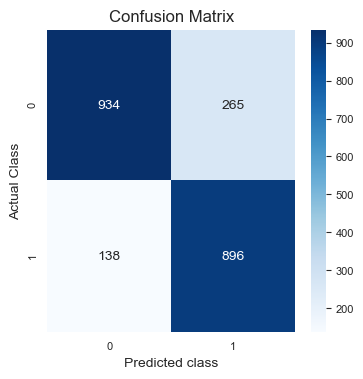

In [78]:
plt.figure(figsize = (4,4))
sns.heatmap(cm_df, annot = True, cmap = 'Blues', fmt="d")
plt.xlabel('Predicted class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

###### ROC - AUC Curve

In [79]:
fpr_dt, tpr_dt , thresholds = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)
print(round(roc_auc_dt,2))

0.88


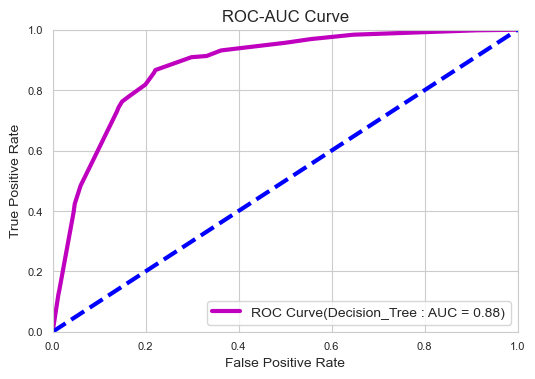

In [80]:
plt.plot(fpr_dt,tpr_dt, linewidth=3, label = 'ROC Curve(Decision_Tree : AUC = {})'.format(round(roc_auc_dt,2)), color = 'm' )
plt.plot([0,1],[0,1], linewidth=3 , linestyle = '--', color = 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

###### Creating csv file of test samples, their actual and predicted values

In [641]:
# DataFrame of test values
df_x_test = pd.DataFrame(x_test)
# DataFrame of actual target values
df_y_test = pd.DataFrame(y_test)
#DataFrame of predicted target values
df_y_pred = pd.DataFrame(predictions)
# Concatinating all three datasets
concat = pd.concat([df_x_test,df_y_test,df_y_pred], axis = 1, ignore_index = True)
new_col = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 
           'month', 'duration', 'campaign','previous', 'poutcome', 'deposit_actual','deposit_predicted']
for i,j in zip(range(0,18),new_col):
    concat.rename(columns = {i : j}, inplace= True)
concat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit_actual,deposit_predicted
0,-0.870804,1.399105,-0.318672,0.953822,-0.123617,-0.808643,-0.947616,2.577830,-0.598149,0.278131,1.113571,0.232002,-0.814270,2.257200,-1.473498,1,1
1,1.016217,-1.391604,1.279987,-1.714823,-0.123617,-0.827908,1.055280,-0.387923,-0.598149,-1.028226,0.800268,-0.621521,-0.814270,2.257200,-1.473498,0,0
2,-0.356162,-1.391604,1.279987,-0.380501,-0.123617,-0.685644,1.055280,-0.387923,1.844786,0.871930,0.800268,-0.870905,-0.156846,-0.543848,0.520705,0,0
3,1.101990,-0.151289,-0.318672,0.953822,-0.123617,0.375403,-0.947616,-0.387923,-0.598149,-0.434427,0.800268,-0.656646,0.500577,2.257200,-0.476397,1,1
4,0.673122,-0.771447,-1.917331,-0.380501,-0.123617,1.326788,-0.947616,-0.387923,1.844786,-1.146986,0.173661,-0.108705,-0.814270,-0.543848,0.520705,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,1.359311,1.399105,-0.318672,-0.380501,-0.123617,-0.807161,1.055280,-0.387923,-0.598149,-0.909466,0.800268,-0.667183,-0.814270,0.576571,-2.470600,0,0
2229,0.330027,-0.151289,-0.318672,0.953822,-0.123617,-0.827908,1.055280,-0.387923,-0.598149,-1.265746,0.800268,0.407624,-0.156846,0.576571,-2.470600,0,1
2230,1.445085,0.158790,-0.318672,-0.380501,-0.123617,0.083466,-0.947616,-0.387923,-0.598149,0.515650,0.800268,0.235515,-0.814270,0.576571,-2.470600,1,1
2231,0.844669,-0.151289,-1.917331,0.953822,-0.123617,-0.758999,1.055280,2.577830,-0.598149,-1.146986,0.800268,-0.463462,-0.814270,-0.543848,0.520705,0,0


These datasets looked like these as these are label encoded and standardized

In [642]:
concat.to_excel('Bank_test.xlsx', encoding='ISO-8859-1')

### Hyperparameter optimization using - GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
np.random.seed(42)

import time
start = time.time()

param_dist = {'max_depth' : [2,4,6,8,10,12,14,16,18,20],'min_samples_leaf' : [2,4,6,8,10],
              'criterion' : ["gini", "entropy"], 'ccp_alpha' : [0.001,0.002,0.003]}
model_dt = DecisionTreeClassifier(random_state = 1)
cv_dt = GridSearchCV(model_dt, cv = 10, param_grid = param_dist, n_jobs = 3)
cv_dt.fit(x_train,y_train)
print('Best parameters using Grid Search: \n',cv_dt.best_params_)
end = time.time()
print('Time taken in Grid Search : {}'.format(round(end - start),2))

Best parameters using Grid Search: 
 {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 6}
Time taken in Grid Search : 55


In [83]:
# Training Decision Tree based on above parameters
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 16, min_samples_leaf = 6, ccp_alpha = 0.001,random_state = 42)
model_dt.fit(x_train,y_train)
model_dt_score_train = model_dt.score(x_train,y_train)
print('Training Score: ',model_dt_score_train)
model_dt_score_test = model_dt.score(x_test,y_test)
print('Training Score: ',model_dt_score_test)

Training Score:  0.8533990368462314
Training Score:  0.8347514554411106


### Using Sweetviz Package for getting Auto generated EDA Report

In [1]:
import sweetviz

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
x = data.iloc[:, :-1]
y = data[['deposit']]

In [11]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [15]:
train = pd.concat([x_train,y_train], axis = 1)
test = pd.concat([x_test,y_test], axis = 1)

In [16]:
report = sweetviz.compare([train,'Train'],[test,'Test'], 'deposit')

In [17]:
report.show_html('Bank_EDA_Sweetviz.html')

Report Bank_EDA_Sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Visualizing Decision Tree

In [86]:
from sklearn import tree

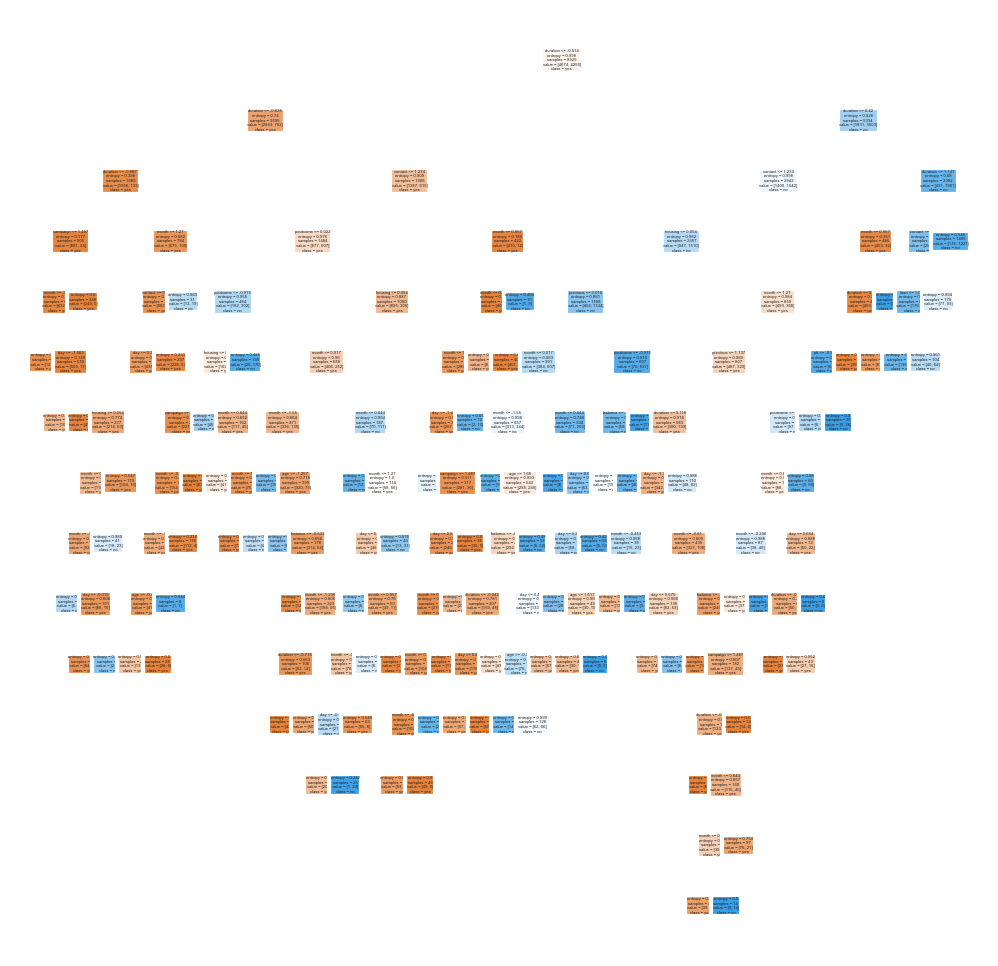

In [93]:
fn = data.columns
cn = data['deposit'].unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_dt,feature_names= fn,class_names= cn, filled= True )
fig.savefig('DT_Bank.png')